# AIM - To create a ML model to identify FM stations

Python version used -> python 3

# Step - 1
## Run RTL_power command 

Install GQRX software then connect RTL_SDR dongle and open terminal.

Note : Following command only works for Linux and Mac OS.

COMMAND -> rtl_power -f min:max:bin -g gain -i interval -e runtime filename.ext
where
min is initial frequency
max is terminal frequency
bin is frequency interval
interval in seconds

COMMAND I USED - 

rtl_power -f 87M:108M:1k -g 20 -i 10 -e 5m logfile.csv

All the data is stored in a csv file logfile.csv.

# Step - 2
## Data cleaning 

We will now convert obtained csv into a desireable pandas dataframe

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dfs = pd.read_csv("logfile.csv", header=None)

Raw data collected from GQRX stored in df dataframe

In [2]:
dfs.head()

,0,1,2,3,4,5,6,7,8,9,...,4093,4094,4095,4096,4097,4098,4099,4100,4101,4102
0,2018-03-30,22:31:10,87000000,89625000,640.87,40,-45.44,-50.61,-52.59,-52.59,...,-53.91,-54.33,-53.71,-54.75,-53.57,-54.38,-53.16,-52.52,-48.98,-48.98
1,2018-03-30,22:31:10,89625000,92250000,640.87,40,-55.90,-57.27,-57.36,-56.05,...,-56.50,-57.31,-58.34,-56.52,-56.05,-57.12,-57.20,-56.05,-57.33,-57.33
2,2018-03-30,22:31:10,92250000,94875000,640.87,40,-40.56,-41.09,-40.24,-41.16,...,-41.91,-41.46,-40.78,-43.21,-42.09,-42.71,-41.34,-40.86,-42.04,-42.04
3,2018-03-30,22:31:10,94875000,97500000,640.87,40,-41.38,-40.05,-39.69,-40.90,...,-44.02,-41.72,-43.54,-40.14,-42.24,-43.46,-41.24,-42.33,-41.59,-41.59
4,2018-03-30,22:31:10,97500000,100125000,640.87,40,-52.95,-55.07,-54.32,-56.54,...,-52.79,-52.11,-53.67,-53.33,-53.83,-52.23,-52.53,-54.32,-54.27,-54.27


In [3]:
dfs.describe()

,2,3,4,5,6,7,8,9,10,11,...,4093,4094,4095,4096,4097,4098,4099,4100,4101,4102
count,2.400000e+02,2.400000e+02,2.400000e+02,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,...,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,9.618750e+07,9.881250e+07,6.408700e+02,40.400000,-49.489583,-50.506667,-50.173292,-50.698083,-50.757958,-50.683667,...,-50.405875,-50.469542,-50.547458,-50.505917,-50.490042,-50.655375,-50.357417,-50.524542,-50.285667,-50.285667
std,6.027200e+06,6.027200e+06,2.164564e-12,1.085469,7.330919,7.642566,7.473736,7.665319,7.907084,7.909045,...,6.951554,7.058668,6.897847,7.201173,7.012471,7.092064,7.172233,7.191567,7.367378,7.367378
min,8.700000e+07,8.962500e+07,6.408700e+02,38.000000,-58.010000,-58.230000,-58.170000,-58.090000,-58.590000,-58.750000,...,-57.960000,-58.480000,-58.360000,-58.340000,-58.840000,-58.970000,-58.720000,-58.630000,-58.340000,-58.340000
25%,9.159375e+07,9.421875e+07,6.408700e+02,40.000000,-55.312500,-56.057500,-55.645000,-55.915000,-56.280000,-56.185000,...,-55.272500,-55.312500,-55.262500,-55.660000,-55.470000,-55.540000,-55.447500,-55.630000,-55.540000,-55.540000
50%,9.618750e+07,9.881250e+07,6.408700e+02,40.000000,-52.780000,-54.590000,-52.860000,-54.755000,-54.760000,-54.460000,...,-53.110000,-53.395000,-53.245000,-53.285000,-53.250000,-53.660000,-53.170000,-54.100000,-54.180000,-54.180000
75%,1.007812e+08,1.034062e+08,6.408700e+02,42.000000,-44.037500,-45.455000,-47.360000,-48.137500,-48.415000,-47.962500,...,-47.507500,-47.892500,-47.675000,-48.865000,-48.927500,-48.620000,-47.445000,-47.640000,-45.820000,-45.820000
max,1.053750e+08,1.080000e+08,6.408700e+02,42.000000,-34.140000,-34.750000,-33.870000,-34.580000,-34.000000,-33.790000,...,-35.900000,-34.770000,-35.190000,-34.500000,-35.600000,-35.660000,-35.280000,-33.150000,-34.930000,-34.930000


Here we'll convert raw data into a useful data which can be used for training/test

The raw data is being converted to a dataframe having 3 coloumns - Frequency captured, corresponding power and Is Fm station or not.

In [4]:
def conversion_function(df):    
    x=[] # Stores all the frequencies
    y=[] # Stores corresponding power value
    z=[] # Stores is_FM, if 1 then yes, if 0 then no

    # following array is obtained from "https://en.wikipedia.org/wiki/Category:Lists_of_radio_stations_by_frequency"
    arr = [76.1, 76.5, 77.1, 78.8, 80.0, 80.2, 81.3, 82.5, 84.7, 87.5, 87.6, 87.7, 87.8, 87.9, 88.0, 88.1, 88.3, 88.5, 88.6, 88.7, 88.8, 88.9, 89.1, 89.2, 89.3, 89.5, 89.6, 89.7, 89.9, 90.0, 90.1, 90.3, 90.5, 90.7, 90.8, 90.9, 91.1, 91.2, 91.3, 91.5, 91.7, 91.9, 92.1, 92.3, 92.5, 92.7, 92.9, 93.1, 93.2, 93.3, 93.5, 93.7, 93.9, 94.1, 94.3, 94.5, 94.7, 94.9, 95.1, 95.2, 95.3, 95.5, 95.6, 95.7, 95.9, 96.1, 96.2, 96.3, 96.4, 96.5, 96.7, 96.8, 96.9, 97.0, 97.1, 97.3, 97.4, 97.5, 97.6, 97.7, 97.9, 98.1, 98.3, 98.5, 98.6, 98.7, 98.9, 99.1, 99.3, 99.5, 99.7, 99.9, 100.0, 100.1, 100.3, 100.4, 100.5, 100.6, 100.7, 100.8, 100.9, 101.1, 101.3, 101.5, 101.6, 101.7, 101.9, 102.1, 102.2, 102.3, 102.5, 102.7, 102.8, 102.9, 103.1, 103.3, 103.5, 103.7, 104.1, 104.2, 104.3, 104.5, 104.7, 104.9, 105.1, 105.2, 105.3, 105.5, 105.6, 105.7, 105.9, 106.0, 106.1, 106.3, 106.5, 106.6, 106.7, 106.8, 106.9, 107.1, 107.2, 107.3, 107.5, 107.6, 107.7, 103.9, 107.9, 108.0]

    for j in range(0,len(df)):
        for i in range(6,4103):
            y.append(float(df[i][j]))
            r = (df[3][j]-df[2][j])/4096
            temp = df[3][j]+(r*(i-6))
            x.append(float(temp))
            check = round((temp/1000000),1)
            n=0
            for k in arr:
                if(check == k):
                    n=1
            z.append(int(n))
    df = pd.DataFrame({"Frequency":x,"Power":y,"Is_FM":z})
    return df

Below dataframe contains 3 coloumns - Frequency captured, power and Is_FM(1 means yes/0 means no)

In [5]:
dfs = conversion_function(dfs)
dfs.head()

,Frequency,Is_FM,Power
0,8.962500e+07,1,-45.44
1,8.962564e+07,1,-50.61
2,8.962628e+07,1,-52.59
3,8.962692e+07,1,-52.59
4,8.962756e+07,1,-53.53


In [6]:
dfs.isnull().sum()

Frequency    0
Is_FM        0
Power        0
dtype: int64

In [7]:
dfs.describe()

,Frequency,Is_FM,Power
count,9.832800e+05,983280.000000,983280.000000
mean,1.001250e+08,0.577435,-47.791829
std,6.062204e+06,0.493968,7.172532
min,8.962500e+07,0.000000,-59.420000
25%,9.487500e+07,0.000000,-51.920000
50%,1.001250e+08,1.000000,-50.200000
75%,1.053750e+08,1.000000,-46.330000
max,1.106250e+08,1.000000,0.010000


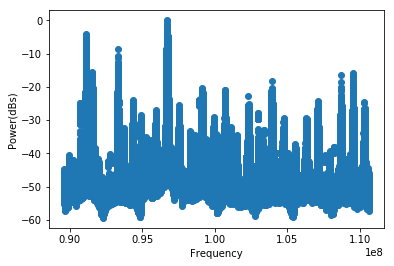

In [8]:
plt.scatter(dfs.Frequency,dfs.Power)
plt.ylabel('Power(dBs)')
plt.xlabel('Frequency')
plt.show()

Red values show it's a FM station. Blue values show it's not a FM station.

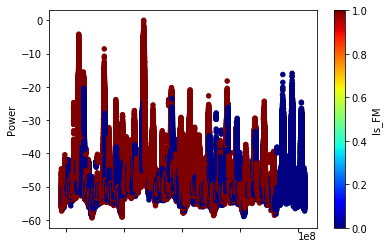

In [9]:
dfs.plot.scatter('Frequency', 'Power', c='Is_FM', colormap='jet')
plt.show()

Checking ratio of values in dataframe

In [10]:
dfs.groupby('Is_FM').count()

,Frequency,Power
Is_FM,,
0,415500,415500
1,567780,567780


# Step 3 - 
## Train all the classification models to find the best one

Note -  For training, frequency range is from 87 MHz to 108 MHz

We'll be using 12% of data as validation data hence it will not be used to train.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
import xgboost as xgb

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings

D:\python\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
X = dfs.drop('Is_FM', axis=1)
y = dfs['Is_FM']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12, random_state=0)

In [13]:
regression_model = LogisticRegression()
regression_model.fit(X_train, y_train)

y_predict = regression_model.predict(X_train)
print("Using Logistic regression -\nTraining accuracy :",accuracy_score(y_train,y_predict)*100,"%")


y_predict = regression_model.predict(X_test)
print("Validation accuracy :",accuracy_score(y_test,y_predict)*100,"%")

Using Logistic regression -
Training accuracy : 57.7290052075 %
Validation accuracy : 57.8495516721 %


In [14]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_train)
print("Using KNN -\nTraining accuracy :",accuracy_score(y_train,y_predict)*100,"%")
y_predict = knn.predict(X_test)
print("Validation accuracy :",accuracy_score(y_test,y_predict)*100,"%")

Using KNN -
Training accuracy : 100.0 %
Validation accuracy : 100.0 %


In [15]:
perceptron = Perceptron()
warnings.filterwarnings("ignore")
perceptron.fit(X_train, y_train)
y_predict = perceptron.predict(X_train)
print("Using Perceptron -\nTraining accuracy :",accuracy_score(y_train,y_predict)*100,"%")
y_predict = perceptron.predict(X_test)
print("Validation accuracy :",accuracy_score(y_test,y_predict)*100,"%")

Using Perceptron -
Training accuracy : 42.2709947925 %
Validation accuracy : 42.1504483279 %


In [16]:
gradboost = xgb.XGBClassifier(n_estimators=1000)
gradboost.fit(X_train, y_train)
y_predict = gradboost.predict(X_train)
print("Using XGBoost -\nTraining accuracy :",accuracy_score(y_train,y_predict)*100,"%")
y_predict = gradboost.predict(X_test)
print("Validation accuracy :",accuracy_score(y_test,y_predict)*100,"%")

Using XGBoost -
Training accuracy : 100.0 %
Validation accuracy : 100.0 %


## Fitting model with 100% of data to use it on randomly generated test data

In [17]:
regression_model = LogisticRegression()
regression_model.fit(X, y)

y_predict = regression_model.predict(X)
print("Using Logistic regression -\nTraining accuracy :",accuracy_score(y,y_predict)*100,"%")

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X, y)

y_predict = knn.predict(X)
print("Using KNN -\nTraining accuracy :",accuracy_score(y,y_predict)*100,"%")

perceptron = Perceptron()
warnings.filterwarnings("ignore")
perceptron.fit(X, y)

y_predict = perceptron.predict(X)
print("Using Perceptron -\nTraining accuracy :",accuracy_score(y,y_predict)*100,"%")

gradboost = xgb.XGBClassifier(n_estimators=1000)
gradboost.fit(X, y)

y_predict = gradboost.predict(X)
print("Using XGBoost -\nTraining accuracy :",accuracy_score(y,y_predict)*100,"%")

Using Logistic regression -
Training accuracy : 57.7434708323 %
Using KNN -
Training accuracy : 100.0 %
Using Perceptron -
Training accuracy : 42.2565291677 %
Using XGBoost -
Training accuracy : 99.9986778944 %


# Step - 4
## Testing with test data in frequency range 87MHz to 108MHz

Command used to generate file -

rtl_power -f 87M:108M:1k -g 20 -i 10 -e 5m lgfile.csv

We'll follow similar steps as training to convert raw data to an useful form which we can use as test data.

In [18]:
dfs = pd.read_csv("lgfile.csv", header=None)

In [19]:
dfs.head()

,0,1,2,3,4,5,6,7,8,9,...,4093,4094,4095,4096,4097,4098,4099,4100,4101,4102
0,2018-04-15,16:06:13,87000000,89625000,640.87,38,-45.84,-55.77,-56.08,-57.61,...,-56.32,-55.66,-56.39,-56.26,-54.67,-55.76,-57.07,-56.30,-51.56,-51.56
1,2018-04-15,16:06:13,89625000,92250000,640.87,38,-55.28,-57.92,-56.26,-55.92,...,-56.83,-56.15,-56.35,-57.09,-57.44,-56.12,-57.32,-56.32,-56.71,-56.71
2,2018-04-15,16:06:13,92250000,94875000,640.87,38,-37.90,-37.65,-38.25,-39.42,...,-37.16,-37.50,-38.46,-37.63,-37.81,-39.55,-38.36,-35.82,-37.16,-37.16
3,2018-04-15,16:06:13,94875000,97500000,640.87,38,-35.69,-39.10,-37.89,-38.95,...,-34.19,-33.40,-35.91,-35.23,-33.25,-33.32,-34.95,-35.30,-36.07,-36.07
4,2018-04-15,16:06:13,97500000,100125000,640.87,38,-53.26,-52.24,-52.38,-53.54,...,-48.42,-49.07,-49.04,-48.56,-49.26,-49.03,-48.11,-50.35,-52.49,-52.49


In [20]:
dfs.describe()

,2,3,4,5,6,7,8,9,10,11,...,4093,4094,4095,4096,4097,4098,4099,4100,4101,4102
count,2.400000e+02,2.400000e+02,2.400000e+02,240.000000,240.00000,240.000000,240.000000,240.000000,240.000000,240.000000,...,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,9.618750e+07,9.881250e+07,6.408700e+02,38.800000,-47.73125,-48.241125,-48.506917,-48.431833,-48.598500,-48.639708,...,-47.294958,-47.358708,-47.420417,-47.369167,-47.512458,-47.427625,-47.412583,-47.826833,-47.827500,-47.827500
std,6.027200e+06,6.027200e+06,2.164564e-12,0.981844,7.12496,7.177868,7.094138,7.200447,7.145083,7.089816,...,7.496900,7.445159,7.460728,7.347426,7.243107,7.323455,7.147915,7.255743,7.112275,7.112275
min,8.700000e+07,8.962500e+07,6.408700e+02,38.000000,-57.59000,-58.660000,-59.310000,-59.050000,-59.050000,-59.050000,...,-58.500000,-57.930000,-58.410000,-58.390000,-57.960000,-58.600000,-58.140000,-58.390000,-58.360000,-58.360000
25%,9.159375e+07,9.421875e+07,6.408700e+02,38.000000,-53.90750,-54.582500,-54.740000,-54.767500,-54.947500,-54.877500,...,-55.092500,-55.115000,-55.205000,-54.925000,-54.887500,-55.042500,-54.722500,-54.555000,-54.247500,-54.247500
50%,9.618750e+07,9.881250e+07,6.408700e+02,38.000000,-51.58500,-51.545000,-52.295000,-51.640000,-51.960000,-51.920000,...,-48.205000,-48.150000,-48.390000,-48.230000,-48.075000,-47.830000,-47.915000,-50.515000,-50.905000,-50.905000
75%,1.007812e+08,1.034062e+08,6.408700e+02,40.000000,-40.36000,-40.975000,-41.152500,-41.147500,-41.252500,-41.147500,...,-39.800000,-40.147500,-40.077500,-40.185000,-40.450000,-40.165000,-40.397500,-40.392500,-40.672500,-40.672500
max,1.053750e+08,1.080000e+08,6.408700e+02,40.000000,-34.48000,-35.650000,-35.600000,-34.740000,-34.160000,-34.750000,...,-34.190000,-33.400000,-34.100000,-33.000000,-33.250000,-33.290000,-34.950000,-34.120000,-34.270000,-34.270000


In [21]:
dfs = conversion_function(dfs)

In [22]:
dfs.head()

,Frequency,Is_FM,Power
0,8.962500e+07,1,-45.84
1,8.962564e+07,1,-55.77
2,8.962628e+07,1,-56.08
3,8.962692e+07,1,-57.61
4,8.962756e+07,1,-54.90


In [23]:
X = dfs.drop('Is_FM', axis=1)
y = dfs['Is_FM']

In [24]:
y_predict = regression_model.predict(X)
print("Using Logistic regression -\nAccuracy Obtained :",accuracy_score(y,y_predict)*100,"%")

Using Logistic regression -
Accuracy Obtained : 57.7434708323 %


In [25]:
y_predict = knn.predict(X)
print("Using KNN -\nAccuracy Obtained :",accuracy_score(y,y_predict)*100,"%")

Using KNN -
Accuracy Obtained : 100.0 %


In [26]:
y_predict = perceptron.predict(X)
print("Using Perceptron -\nAccuracy Obtained :",accuracy_score(y,y_predict)*100,"%")

Using Perceptron -
Accuracy Obtained : 42.2565291677 %


In [27]:
y_predict = gradboost.predict(X)
print("Using XGBoost -\nAccuracy Obtained :",accuracy_score(y,y_predict)*100,"%")

Using XGBoost -
Accuracy Obtained : 99.9963387845 %


# Step - 5
## Generating list of fm stations recognised -

In [19]:
dfs = pd.read_csv("lgfile.csv", header=None)

In [24]:
def conv_func(df):
    x=[] # Stores all the frequencies
    y=[] # Stores corresponding power value
    
    for j in range(0,len(df)):
        for i in range(6,4103):
            y.append(float(df[i][j]))
            r = (df[3][j]-df[2][j])/4096
            temp = df[3][j]+(r*(i-6))
            x.append(float(temp))
    df = pd.DataFrame({"Frequency":x,"Power":y})
    return df

In [23]:
dfs = conv_func(dfs)

In [45]:
st = int(round(dfs["Frequency"][0]/1000000,3))
nd = int(round(dfs["Frequency"][len(dfs.Frequency)-1]/1000000,3))

In [24]:
y_predict = gradboost.predict(dfs)

In [46]:
l=[]
for i in range(0,len(y_predict)):
    num = int(round(dfs["Frequency"][i]/1000000,3))
    if(y_predict[i]==1):
        if(not num in l):
            l.append(num)

In [47]:
print("FM Stations in freq range",st,"-",nd)
print(l)

FM Stations in freq range 89 - 110
[89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108]


In [49]:
#Bay Area FM Radio Station

BAFMRS = [87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107]
print(BAFMRS)

[87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107]


# Step - 6
## Testing with test data in frequency range 60MHz to 2400MHz

Command used to generate file -

rtl_power -f 60M:2400M:1k -g 20 -i 10 -e 60m logfile1.csv

As the file size of logfile1 is 1.7 Gb, we'll use below code to divide it into many csv files having 500 rows each. Total 111 files were made.

Logfile1 is too big tobe added to github hence generation of file is required.

In [22]:
%%time
df = pd.read_csv("logfile1.csv", header=None,chunksize=500)
warnings.filterwarnings("ignore")
count = 1
path  = "C:/Users/Bomber11/Desktop/tempfolder/"  #Enter path where you want to store 100+ csv files
for chunk in df:
    name = path+"checkfile_"+str(count)+".csv" 
    chunk.to_csv(name,header=None,index=None)
    if(count%20==0):
        print(count)
    count+=1

20
40
60
80
100
Wall time: 9min 32s


### Finding accuracy score for all csv files when rows having infinite values are dropped -

In [29]:
rm = 0
kn = 0
per = 0
xg = 0
for letscheck in range (1,112):
    dfs = pd.read_csv(path+"checkfile_"+str(letscheck)+".csv", header=None)
    warnings.filterwarnings("ignore")
    
    startf = dfs[2][0]
    endf = dfs[3][len(dfs)-1]
    
    dfs = conversion_function(dfs)
    dfs = dfs.replace([np.inf, -np.inf], np.nan)
    dfs = dfs.dropna(axis=0, how='any')
    
    X = dfs.drop('Is_FM', axis=1)
    y = dfs['Is_FM']
    
    print("From frequency range ", startf ," to ", endf)
    
    y_predict = regression_model.predict(X)
    rm = rm + accuracy_score(y,y_predict)
    print("Using Logistic regression -\nAccuracy Obtained :",accuracy_score(y,y_predict)*100,"%")
    
    y_predict = knn.predict(X)
    kn = kn + accuracy_score(y,y_predict)
    print("Using KNN -\nAccuracy Obtained :",accuracy_score(y,y_predict)*100,"%")
    
    y_predict = perceptron.predict(X)
    per = per + accuracy_score(y,y_predict)
    print("Using Perceptron -\nAccuracy Obtained :",accuracy_score(y,y_predict)*100,"%")
    
    y_predict = gradboost.predict(X)
    xg = xg + accuracy_score(y,y_predict)
    print("Using XGBoost -\nAccuracy Obtained :",accuracy_score(y,y_predict)*100,"%")

From frequency range  60000000  to  1459117499
Using Logistic regression -
Accuracy Obtained : 1.05741704062 %
Using KNN -
Accuracy Obtained : 98.2719589717 %
Using Perceptron -
Accuracy Obtained : 98.9425829594 %
Using XGBoost -
Accuracy Obtained : 98.2706866262 %
From frequency range  1459117500  to  770751689
Using Logistic regression -
Accuracy Obtained : 1.05705224288 %
Using KNN -
Accuracy Obtained : 98.2716038508 %
Using Perceptron -
Accuracy Obtained : 98.9429477571 %
Using XGBoost -
Accuracy Obtained : 98.2700868553 %
From frequency range  770751690  to  82385879
Using Logistic regression -
Accuracy Obtained : 0.0642498354607 %
Using KNN -
Accuracy Obtained : 98.4639249163 %
Using Perceptron -
Accuracy Obtained : 99.9357501645 %
Using XGBoost -
Accuracy Obtained : 98.4639249163 %
From frequency range  82385880  to  1481503379
Using Logistic regression -
Accuracy Obtained : 0.992725591092 %
Using KNN -
Accuracy Obtained : 99.8078264125 %
Using Perceptron -
Accuracy Obtained : 9

Using XGBoost -
Accuracy Obtained : 98.2711955806 %
From frequency range  994610490  to  306244679
Using Logistic regression -
Accuracy Obtained : 1.05750381927 %
Using KNN -
Accuracy Obtained : 98.2730846659 %
Using Perceptron -
Accuracy Obtained : 98.9424961807 %
Using XGBoost -
Accuracy Obtained : 98.2713719902 %
From frequency range  306244680  to  1705362179
Using Logistic regression -
Accuracy Obtained : 0.0 %
Using KNN -
Accuracy Obtained : 100.0 %
Using Perceptron -
Accuracy Obtained : 100.0 %
Using XGBoost -
Accuracy Obtained : 100.0 %
From frequency range  1705362180  to  1016996369
Using Logistic regression -
Accuracy Obtained : 1.05805917439 %
Using KNN -
Accuracy Obtained : 98.2720780914 %
Using Perceptron -
Accuracy Obtained : 98.9419408256 %
Using XGBoost -
Accuracy Obtained : 98.2708547319 %
From frequency range  1016996370  to  328630559
Using Logistic regression -
Accuracy Obtained : 1.05776425388 %
Using KNN -
Accuracy Obtained : 98.2718045512 %
Using Perceptron -
Ac

From frequency range  1929220980  to  1240855169
Using Logistic regression -
Accuracy Obtained : 1.05750145829 %
Using KNN -
Accuracy Obtained : 98.2722745726 %
Using Perceptron -
Accuracy Obtained : 98.9424985417 %
Using XGBoost -
Accuracy Obtained : 98.2709533075 %
From frequency range  1240855170  to  552489359
Using Logistic regression -
Accuracy Obtained : 1.05779479515 %
Using KNN -
Accuracy Obtained : 98.2732227922 %
Using Perceptron -
Accuracy Obtained : 98.9422052048 %
Using XGBoost -
Accuracy Obtained : 98.2717546523 %
From frequency range  552489360  to  1951606859
Using Logistic regression -
Accuracy Obtained : 0.0 %
Using KNN -
Accuracy Obtained : 100.0 %
Using Perceptron -
Accuracy Obtained : 100.0 %
Using XGBoost -
Accuracy Obtained : 100.0 %
From frequency range  1951606860  to  1263241049
Using Logistic regression -
Accuracy Obtained : 1.0575169834 %
Using KNN -
Accuracy Obtained : 98.2725917632 %
Using Perceptron -
Accuracy Obtained : 98.9424830166 %
Using XGBoost -
A

From frequency range  776348160  to  87982349
Using Logistic regression -
Accuracy Obtained : 0.244578342142 %
Using KNN -
Accuracy Obtained : 98.2731242265 %
Using Perceptron -
Accuracy Obtained : 99.7554216579 %
Using XGBoost -
Accuracy Obtained : 98.2731242265 %
From frequency range  87982350  to  1487099849
Using Logistic regression -
Accuracy Obtained : 0.812620602342 %
Using KNN -
Accuracy Obtained : 99.9986297274 %
Using Perceptron -
Accuracy Obtained : 99.1873793977 %
Using XGBoost -
Accuracy Obtained : 99.9973083931 %
From frequency range  1487099850  to  798734039
Using Logistic regression -
Accuracy Obtained : 1.05784659683 %
Using KNN -
Accuracy Obtained : 98.2718788583 %
Using Perceptron -
Accuracy Obtained : 98.9421534032 %
Using XGBoost -
Accuracy Obtained : 98.2705086541 %
From frequency range  798734040  to  110368229
Using Logistic regression -
Accuracy Obtained : 1.0582212527 %
Using KNN -
Accuracy Obtained : 98.2718883862 %
Using Perceptron -
Accuracy Obtained : 98.

In [33]:
print("Total accuracy using Logistic regression = ",(rm/111)*100,"%\nTotal accuracy using KNN = ",(kn/111)*100,"%\nTotal accuracy using Perceptron = ",(per/111)*100,"%\nTotal accuracy using XGBoost = ",(xg/111)*100,"%")

Total accuracy using Logistic regression =  0.698660335002 %
Total accuracy using KNN =  97.9655933516 %
Total accuracy using Perceptron =  98.4084825221 %
Total accuracy using XGBoost =  97.9647016024 %


### Assumption - 1 -> Let's replace all nan values mean of the column and compare the results

In [41]:
rm = 0
kn = 0
per = 0
xg = 0
for letscheck in range (1,112):
    dfs = pd.read_csv(path+"checkfile_"+str(letscheck)+".csv", header=None)
    warnings.filterwarnings("ignore")

    startf = dfs[2][0]
    endf = dfs[3][len(dfs)-1]

    dfs = conversion_function(dfs)
    dfs = dfs.replace([np.inf, -np.inf], np.nan)
    dfs = dfs.fillna(dfs.mean())

    X = dfs.drop('Is_FM', axis=1)
    y = dfs['Is_FM']

    print("From frequency range ", startf ," to ", endf)

    y_predict = regression_model.predict(X)
    rm = rm + accuracy_score(y,y_predict)
    print("Using Logistic regression -\nAccuracy Obtained :",accuracy_score(y,y_predict)*100,"%")

    y_predict = knn.predict(X)
    kn = kn + accuracy_score(y,y_predict)
    print("Using KNN -\nAccuracy Obtained :",accuracy_score(y,y_predict)*100,"%")

    y_predict = perceptron.predict(X)
    per = per + accuracy_score(y,y_predict)
    print("Using Perceptron -\nAccuracy Obtained :",accuracy_score(y,y_predict)*100,"%")

    y_predict = gradboost.predict(X)
    xg = xg + accuracy_score(y,y_predict)
    print("Using XGBoost -\nAccuracy Obtained :",accuracy_score(y,y_predict)*100,"%")

From frequency range  60000000  to  1459117499
Using Logistic regression -
Accuracy Obtained : 1.05789602148 %
Using KNN -
Accuracy Obtained : 98.2723456187 %
Using Perceptron -
Accuracy Obtained : 98.9421039785 %
Using XGBoost -
Accuracy Obtained : 98.2710763974 %
From frequency range  1459117500  to  770751689
Using Logistic regression -
Accuracy Obtained : 1.05789602148 %
Using KNN -
Accuracy Obtained : 98.2723456187 %
Using Perceptron -
Accuracy Obtained : 98.9421039785 %
Using XGBoost -
Accuracy Obtained : 98.2708323163 %
From frequency range  770751690  to  82385879
Using Logistic regression -
Accuracy Obtained : 0.0642909445936 %
Using KNN -
Accuracy Obtained : 98.4642909446 %
Using Perceptron -
Accuracy Obtained : 99.9357090554 %
Using XGBoost -
Accuracy Obtained : 98.4642909446 %
From frequency range  82385880  to  1481503379
Using Logistic regression -
Accuracy Obtained : 0.993605076886 %
Using KNN -
Accuracy Obtained : 99.8080546742 %
Using Perceptron -
Accuracy Obtained : 9

Using XGBoost -
Accuracy Obtained : 98.2708811325 %
From frequency range  994610490  to  306244679
Using Logistic regression -
Accuracy Obtained : 1.05789602148 %
Using KNN -
Accuracy Obtained : 98.2723456187 %
Using Perceptron -
Accuracy Obtained : 98.9421039785 %
Using XGBoost -
Accuracy Obtained : 98.2706370515 %
From frequency range  306244680  to  1705362179
Using Logistic regression -
Accuracy Obtained : 0.0 %
Using KNN -
Accuracy Obtained : 100.0 %
Using Perceptron -
Accuracy Obtained : 100.0 %
Using XGBoost -
Accuracy Obtained : 100.0 %
From frequency range  1705362180  to  1016996369
Using Logistic regression -
Accuracy Obtained : 1.05789602148 %
Using KNN -
Accuracy Obtained : 98.2723456187 %
Using Perceptron -
Accuracy Obtained : 98.9421039785 %
Using XGBoost -
Accuracy Obtained : 98.2711252136 %
From frequency range  1016996370  to  328630559
Using Logistic regression -
Accuracy Obtained : 1.05789602148 %
Using KNN -
Accuracy Obtained : 98.2723456187 %
Using Perceptron -
Ac

From frequency range  1929220980  to  1240855169
Using Logistic regression -
Accuracy Obtained : 1.05789602148 %
Using KNN -
Accuracy Obtained : 98.2723456187 %
Using Perceptron -
Accuracy Obtained : 98.9421039785 %
Using XGBoost -
Accuracy Obtained : 98.2710275812 %
From frequency range  1240855170  to  552489359
Using Logistic regression -
Accuracy Obtained : 1.05789602148 %
Using KNN -
Accuracy Obtained : 98.2723456187 %
Using Perceptron -
Accuracy Obtained : 98.9421039785 %
Using XGBoost -
Accuracy Obtained : 98.2708811325 %
From frequency range  552489360  to  1951606859
Using Logistic regression -
Accuracy Obtained : 0.0 %
Using KNN -
Accuracy Obtained : 100.0 %
Using Perceptron -
Accuracy Obtained : 100.0 %
Using XGBoost -
Accuracy Obtained : 100.0 %
From frequency range  1951606860  to  1263241049
Using Logistic regression -
Accuracy Obtained : 1.05789602148 %
Using KNN -
Accuracy Obtained : 98.2723456187 %
Using Perceptron -
Accuracy Obtained : 98.9421039785 %
Using XGBoost -


From frequency range  776348160  to  87982349
Using Logistic regression -
Accuracy Obtained : 0.245203807664 %
Using KNN -
Accuracy Obtained : 98.2737124725 %
Using Perceptron -
Accuracy Obtained : 99.7547961923 %
Using XGBoost -
Accuracy Obtained : 98.2737124725 %
From frequency range  87982350  to  1487099849
Using Logistic regression -
Accuracy Obtained : 0.812692213815 %
Using KNN -
Accuracy Obtained : 99.9986331462 %
Using Perceptron -
Accuracy Obtained : 99.1873077862 %
Using XGBoost -
Accuracy Obtained : 99.9973151086 %
From frequency range  1487099850  to  798734039
Using Logistic regression -
Accuracy Obtained : 1.05789602148 %
Using KNN -
Accuracy Obtained : 98.2723456187 %
Using Perceptron -
Accuracy Obtained : 98.9421039785 %
Using XGBoost -
Accuracy Obtained : 98.2709787649 %
From frequency range  798734040  to  110368229
Using Logistic regression -
Accuracy Obtained : 1.05789602148 %
Using KNN -
Accuracy Obtained : 98.2723456187 %
Using Perceptron -
Accuracy Obtained : 98

In [43]:
print("Total accuracy using Logistic regression = ",(rm/111)*100,"%\nTotal accuracy using KNN = ",(kn/111)*100,"%\nTotal accuracy using Perceptron = ",(per/111)*100,"%\nTotal accuracy using XGBoost = ",(xg/111)*100,"%")

Total accuracy using Logistic regression =  0.705264014319 %
Total accuracy using KNN =  98.8482304125 %
Total accuracy using Perceptron =  99.2947359857 %
Total accuracy using XGBoost =  98.84733281 %


So Accuracy score for KNN and XGBoost increased by a little amount.

## Part 7 
### Creating list of frequencies recognized as FM stations and comparing it with real one
### for frequency range 60-2400 MHz

In [26]:
%%time
l = []
for letscheck in range (1,112):
    dfs = pd.read_csv(path+"checkfile_"+str(letscheck)+".csv", header=None)
    warnings.filterwarnings("ignore")

    startf = dfs[2][0]
    endf = dfs[3][len(dfs)-1]

    dfs = conv_func(dfs)
    dfs = dfs.replace([np.inf, -np.inf], np.nan)
    dfs = dfs.fillna(dfs.mean())
    
    print("frequency range ", startf ," to ", endf)

    y_predict = perceptron.predict(dfs)

    for i in range(0,len(y_predict)):
        num = (int(round(dfs["Frequency"][i]/100000,3)))/10
        if(y_predict[i]==1):
            if(not num in l):
                l.append(num)
    print(l)

frequency range  60000000  to  1459117499
[]
frequency range  1459117500  to  770751689
[]
frequency range  770751690  to  82385879
[]
frequency range  82385880  to  1481503379
[]
frequency range  1481503380  to  793137569
[]
frequency range  793137570  to  104771759
[]
frequency range  104771760  to  1503889259
[]
frequency range  1503889260  to  815523449
[]
frequency range  815523450  to  127157639
[]
frequency range  127157640  to  1526275139
[]
frequency range  1526275140  to  837909329
[]
frequency range  837909330  to  149543519
[]
frequency range  149543520  to  1548661019
[]
frequency range  1548661020  to  860295209
[]
frequency range  860295210  to  171929399
[]
frequency range  171929400  to  1571046899
[]
frequency range  1571046900  to  882681089
[]
frequency range  882681090  to  194315279
[]
frequency range  194315280  to  1593432779
[]
frequency range  1593432780  to  905066969
[]
frequency range  905066970  to  216701159
[]
frequency range  216701160  to  1615818659
[

In [27]:
%%time
l = []
dfs = pd.read_csv(path+"checkfile_"+str(1)+".csv", header=None)
warnings.filterwarnings("ignore")

startf = dfs[2][0]
endf = dfs[3][len(dfs)-1]

dfs = conv_func(dfs)
dfs = dfs.replace([np.inf, -np.inf], np.nan)
dfs = dfs.fillna(dfs.mean())

print("frequency range ", startf ," to ", endf)

y_predict = perceptron.predict(dfs)

frequency range  60000000  to  1459117499
Wall time: 3min 51s


In [31]:
c=0
for i in range(0,len(y_predict)):
    if(y_predict[i]==1):
        c=c+1
c

0

In [ ]:
for i in range(0,len(y_predict)):
    num = (int(round(dfs["Frequency"][i]/100000,3)))/10
    if(y_predict[i]==1):
        if(not num in l):
            l.append(num)
print(l)